In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import scipy 
from PIL import Image
import cv2 as cv
import os
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
PATH = "D:\Kaggle"
img_path = "D:\Kaggle\DVC\cats\cat_1.jpg"

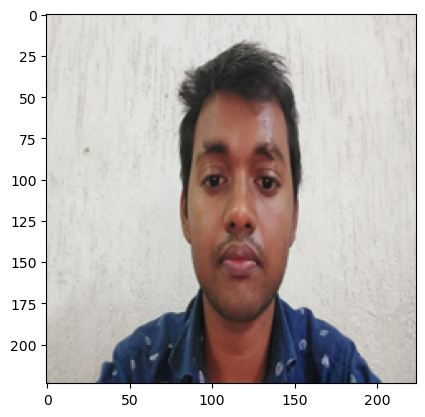

In [5]:
img = cv.imread(r"C:\Users\s9554\OneDrive\Pictures\my.jpg", 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = Image.fromarray(img, "RGB")
img = img.resize((224, 224))
img = np.array(img)
plt.imshow(img)

In [6]:
img_tensor = tf.expand_dims(img, axis = 0)
print(img_tensor.shape)
img_input = preprocess_input(img_tensor)

(1, 224, 224, 3)


In [7]:
model = ResNet50(weights = "imagenet")
model.summary()



Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                     

In [8]:
modelCustomResNet = ResNet50(weights = "imagenet", include_top = False, input_shape = (224, 224, 3))
modelCustomResNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [9]:
print(model.layers[-1])
print(model.layers[-4])

In [10]:
print(model.layers[-1].name)

predictions


In [11]:
predModel1Weight = model.layers[-1].get_weights()[0]
print(predModel1Weight)

[[-0.01490746  0.0113374  -0.05073728 ... -0.02179668 -0.07764222
   0.01018347]
 [-0.00294467  0.00319835  0.01953556 ...  0.03623696  0.00350259
  -0.03321117]
 [-0.01751374  0.00807406  0.00851311 ... -0.03024036  0.05494978
  -0.02511911]
 ...
 [ 0.025289    0.0630148   0.02041481 ... -0.00508354 -0.03542514
  -0.01306196]
 [-0.00623157 -0.01624131 -0.01221174 ...  0.01376359  0.04087579
  -0.0185826 ]
 [-0.02668471  0.0130982  -0.01847764 ...  0.06304929  0.02561448
  -0.00693536]]


In [12]:
ResModelDefault = keras.Model(inputs = model.input, 
                 outputs = (model.layers[-4].output, model.layers[-1].output))

In [13]:
ResModelDefault.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
conv_out, pred = ResModelDefault.predict(img_input)

1/1 [==============================] - 2s 2s/step


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(ResModelDefault)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\s9554\AppData\Local\Temp\tmp1jyggnfn\assets


INFO:tensorflow:Assets written to: C:\Users\s9554\AppData\Local\Temp\tmp1jyggnfn\assets


In [32]:
ResModelDefault.save("finalModelWaterPollution.h5")

c:\Users\s9554\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
for p in pred:
    print(p > 0.2)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [16]:
conv_out = np.squeeze(conv_out)
pred = np.argmax(pred)
print(pred)

643


In [17]:
h = int(img.shape[0]/conv_out.shape[0])
w = int(img.shape[1]/conv_out.shape[1])
upsampled_last_conv_output = scipy.ndimage.zoom(conv_out, (h, w, 1), order=1)
last_layer_weights_for_pred = predModel1Weight[:, pred]
print(last_layer_weights_for_pred)

[-0.01880158 -0.01416248 -0.02599876 ... -0.0425184  -0.01434845
  0.01541316]


In [18]:
print(upsampled_last_conv_output.shape)

(224, 224, 2048)


In [19]:
last_layer_weight = predModel1Weight
heat_map = np.dot(upsampled_last_conv_output.reshape((224*224, 2048)), 
                  last_layer_weights_for_pred).reshape(224,224) 

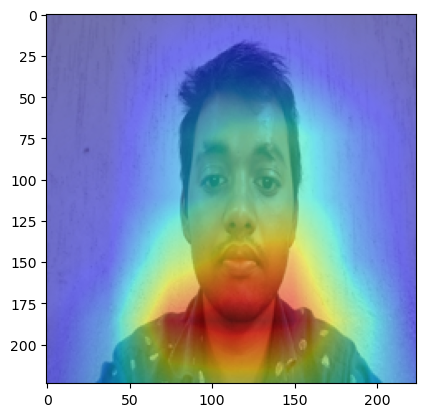

In [20]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.imshow(heat_map, cmap='jet', alpha = 0.5)
plt.show()

In [22]:
dataSet = keras.utils.image_dataset_from_directory(
    directory = os.path.join(PATH, 'DVC'),
    seed = 43,
    image_size = (224, 224),
    validation_split = 0.2,
    batch_size = 64,
    subset = "training"
)

testSet = keras.utils.image_dataset_from_directory(
    directory = os.path.join(PATH, 'DVC'),
    seed = 43, 
    image_size = (224, 224),
    validation_split = 0.2,
    batch_size = 64,
    subset = "validation"
)

Found 697 files belonging to 2 classes.
Using 558 files for training.
Found 697 files belonging to 2 classes.
Using 139 files for validation.


In [23]:
class_names = dataSet.class_names
print(class_names)

['cats', 'dogs']


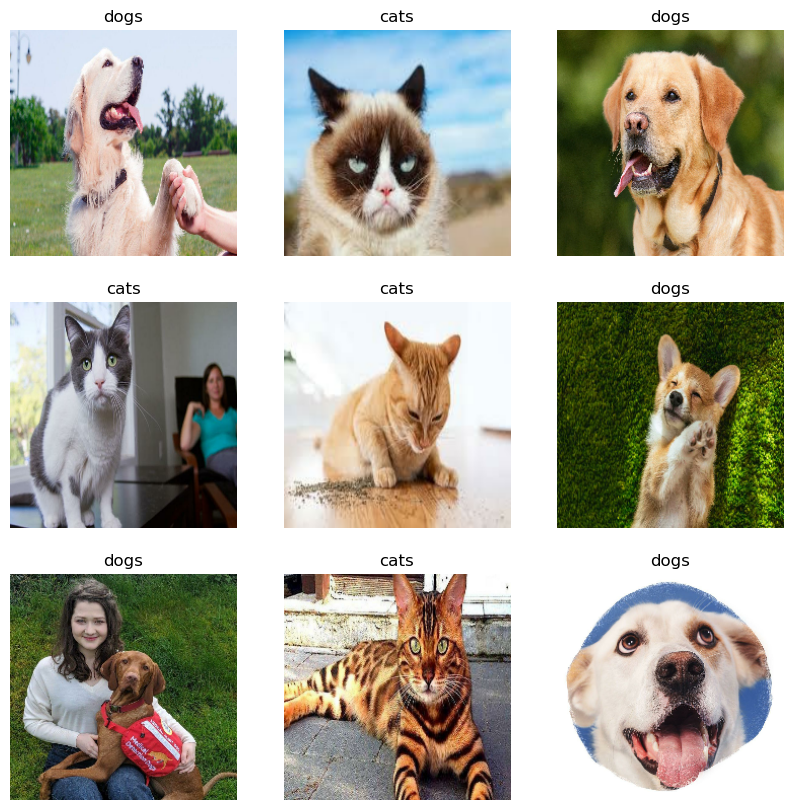

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in dataSet.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
for image_batch, labels_batch in dataSet:
  print(image_batch.shape)
  print(labels_batch)
  break

(64, 224, 224, 3)
tf.Tensor(
[0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0], shape=(64,), dtype=int32)


In [26]:
AUTOTUNE = tf.data.AUTOTUNE
dataSet = dataSet.prefetch(buffer_size=AUTOTUNE)

In [27]:
for layer in modelCustomResNet.layers:
    layer.trainable = False

In [28]:
gap = keras.layers.GlobalAveragePooling2D()(modelCustomResNet.output)
out = keras.layers.Dense(1, activation = "sigmoid")(gap)
modelCus = keras.Model(inputs = modelCustomResNet.input, outputs = out)

In [29]:
modelCus.compile(loss = keras.losses.binary_crossentropy,
                 optimizer = "adam",
                 metrics = ["accuracy"]
)

In [30]:
his = modelCus.fit(
    dataSet,
    epochs = 3,
    validation_data = testSet,
)

Epoch 1/3




9/9 [==============================] - 37s 3s/step - loss: 0.6340 - accuracy: 0.6846 - val_loss: 0.4093 - val_accuracy: 0.8201
Epoch 2/3
9/9 [==============================] - 27s 3s/step - loss: 0.2910 - accuracy: 0.9158 - val_loss: 0.2371 - val_accuracy: 0.9209
Epoch 3/3
9/9 [==============================] - 25s 3s/step - loss: 0.1914 - accuracy: 0.9337 - val_loss: 0.1927 - val_accuracy: 0.9209


In [34]:
img_path = r"D:\Kaggle\DogAndCat\test_set\test_set\cats\cat.4014.jpg"

In [35]:
def pred(img_path):
    img = load_img(img_path,target_size = (224,224))
    x = img_to_array(img) 
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)
    p = modelCus.predict(x)
    print(p)
    if p < 0.5:
        print("cat")
    else:
        print("dog")

1/1 [==============================] - 0s 156ms/step
[[0.0286436]]
cat


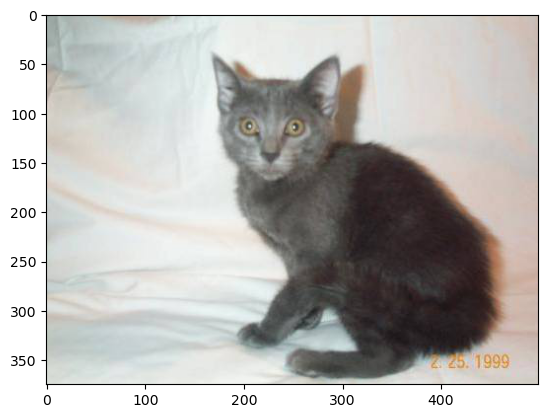

In [36]:
pred(img_path)
img = plt.imread(img_path)
plt.imshow(img)

In [37]:
def heatMap():
    last_layer_weights = modelCus.layers[-1].get_weights()[0]
    img = load_img(img_path,target_size = (224,224))
    img2 = img_to_array(img)
    x = img_to_array(img) 
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)
    pred_class = 0 if modelCus.predict(x) < 0.5 else 1
    last_layer_weights_for_pred = last_layer_weights[:, pred_class]
    print(last_layer_weights_for_pred.shape)
    last_conv_model = keras.Model(model.input, model.get_layer("conv5_block3_out").output)
    last_conv_output = last_conv_model.predict(x)
    last_conv_output = np.squeeze(last_conv_output)
    print(last_conv_output.shape)
    h = int(img2.shape[0]/last_conv_output.shape[0])
    w = int(img2.shape[1]/last_conv_output.shape[1])
    upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1)
    print(upsampled_last_conv_output.shape)
    heat_map = np.dot(upsampled_last_conv_output.reshape((224 * 224, 2048)), 
                     last_layer_weights_for_pred).reshape(img2.shape[0],img2.shape[1])
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.imshow(heat_map, cmap='jet', alpha=0.5)
    plt.show()

1/1 [==============================] - 0s 159ms/step
(2048,)
1/1 [==============================] - 2s 2s/step
(7, 7, 2048)
(224, 224, 2048)


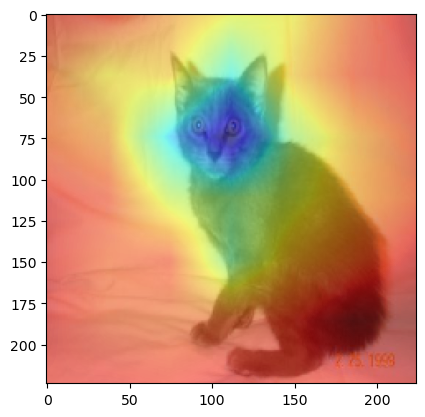

In [38]:
heatMap()